In [1]:
from Bio.Seq import Seq
from Bio import SeqIO
import pandas as pd
import seaborn as sns

In [2]:
Data_df = pd.read_csv("Test_Data.csv")
Data_df

,Sample,Accession,Original Bank,Genotyping Institution,species,group1,group2,Passport Species,Passport Classification,Country,...,Latitude,Longitude,lc,fw22,fw32,fw113,fas,ovate,sun,sun_dup
0,8697,8697,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_2,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8698,8698,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_1,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8699,8699,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_1,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8700,8700,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_2,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8701,8701,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_2,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8805,8805,OSU,OSU,SLL,SLL_processing_1,SLL_processing_1_1,SLL,SLL_processing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,071733-1,071733-1,Cornell,OSU,mixture,mixture,mixture,SLL,SLL_fresh,USA,...,NaN,NaN,A,B,B,B,B,A,NaN,A
7,071820-2,071820-2,Cornell,OSU,mixture,mixture,mixture,SLL,SLL_fresh,USA,...,NaN,NaN,A,B,B,B,NaN,NaN,NaN,A
8,091004-15,091004-15,Cornell,OSU,mixture,mixture,mixture,SLL,SLL_fresh,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,091109-3,091109-3,Cornell,OSU,SLL,SLL_fresh,SLL_fresh_2,SLL,SLL_fresh_NY,USA,...,NaN,NaN,A,B,B,B,NaN,A,NaN,A


In [3]:
Filtered_df = Data_df[['group2', 'Passport Classification']].copy()

In [4]:
Filtered_df

,group2,Passport Classification
0,SLL_processing_1_2,SLL_processing
1,SLL_processing_1_1,SLL_processing
2,SLL_processing_1_1,SLL_processing
3,SLL_processing_1_2,SLL_processing
4,SLL_processing_1_2,SLL_processing
5,SLL_processing_1_1,SLL_processing
6,mixture,SLL_fresh
7,mixture,SLL_fresh
8,mixture,SLL_fresh
9,SLL_fresh_2,SLL_fresh_NY


In [7]:
Ordered_df = Filtered_df.groupby(Filtered_df.columns.tolist()).size().reset_index().rename(columns={0:'size'})
Ordered_df

,group2,Passport Classification,size
0,SLL_1,SLL_fresh,1
1,SLL_fresh_2,SLL_fresh_NY,5
2,SLL_processing_1_1,SLL_processing,3
3,SLL_processing_1_2,SLL_processing,3
4,mixture,SLL_fresh,4


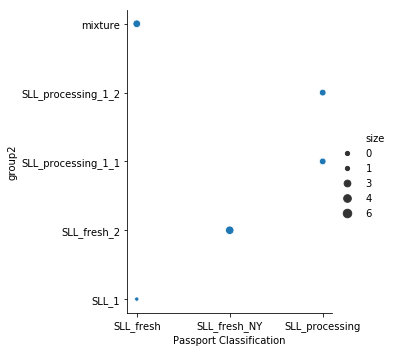

In [8]:
sns.relplot("Passport Classification",
            "group2",
            data = Ordered_df, 
            size = "size")